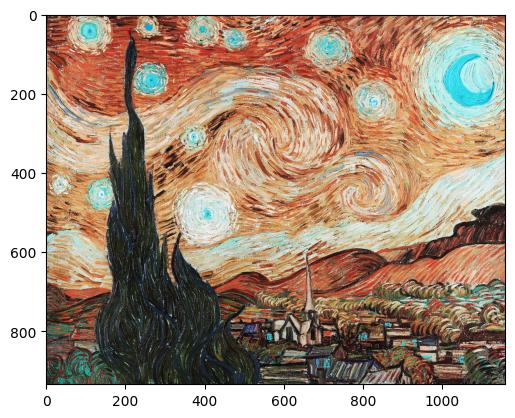

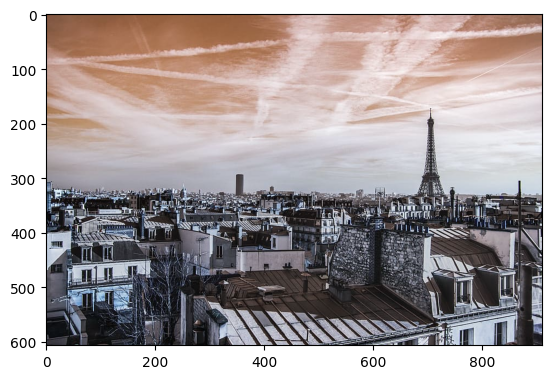

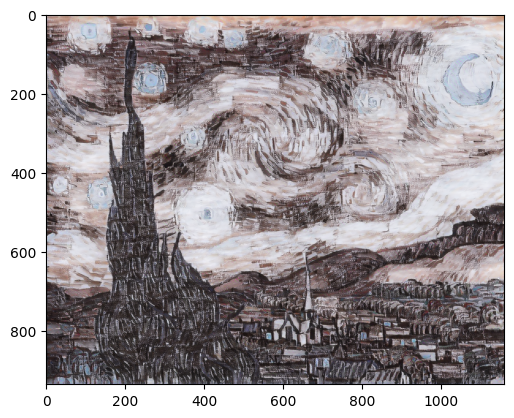

In [1]:
# !pip install tensorflow-hub

import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_img(path):
    
    img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    img = img/255.
    return img

content_image = load_img('style.jpeg')

style_1 = load_img('content.jpeg')


model =hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
         
# Apply the style
def apply_style(content_image, style):
    content_image = content_image.reshape(1, content_image.shape[0],
                                          content_image.shape[1], 
                                          content_image.shape[2]).astype('float32')
    
    # content_image = tf.convert_to_tensor(content_image)
    
    style = cv2.resize(style, (256,256))
    
    style = style.reshape(1, style.shape[0], 
                          style.shape[1],
                          style.shape[2]).astype('float32')
    
    outputs = model(tf.constant(content_image), tf.constant(style))
    stylized_image = outputs[0]
    return stylized_image

#display the image
img = apply_style(content_image, style_1)

plt.grid(False)
plt.imshow(img[0])
plt.show()
